In [307]:
import math
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy as np
plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['text.usetex'] = True
# sudo apt-get install texlive-latex-base texlive-fonts-recommended texlive-fonts-extra texlive-latex-extra
fontsize=25


In [279]:
import matplotlib.colors as mcolors

default_blue = mcolors.to_hex(mcolors.TABLEAU_COLORS['tab:blue'])
default_orange = mcolors.to_hex(mcolors.TABLEAU_COLORS['tab:orange'])

In [342]:
def replace_graph_names(df):
    df["Input Graph"] = df["Input Graph"].str.replace("com-", "", regex=True)\
                                    .str.replace(".gbbs.txt", "", regex=True)\
                                    .str.replace(".bin", "", regex=True)\
                                    .str.replace(".ungraph.txt", "", regex=True)\
                                    .str.replace(".graph.txt", "", regex=True)

    df["Input Graph"] = df["Input Graph"].str.replace("amazon", "AM", regex=True)\
                                    .str.replace("youtube", "YT", regex=True)\
                                    .str.replace("dblp", "DB", regex=True)\
                                    .str.replace("lj", "LJ", regex=True)\
                                    .str.replace("orkut", "OK", regex=True)\
                                    .str.replace("friendster", "FS", regex=True)

def set_face_grid_ax_ticks(g):
    """Set fontsize for x and y axis ticks for all axes in a FacetGrid."""
    for ax in g.axes.flat:
        set_ax_ticks(ax)


def set_ax_ticks(ax):
    for l in ax.yaxis.get_ticklabels():
        l.set_fontsize(fontsize)
    for l in ax.xaxis.get_ticklabels():
        l.set_fontsize(fontsize)
        
def common_ax_style(ax):
    ax.set_xticks([1, 4, 8, 16, 30, 60])
    ax.set_xticklabels([1, 4, 8, 16, 30, "30h"])
    
    ax.set_yscale('log')
    # plt.yticks([0.03, 0.1, 0.3, 1])
    # ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    set_ax_ticks(ax)
        
    ax.set_xlabel("Threads", fontsize = fontsize)

def plot_data(df, ax, color_dict=None):
    if color_dict is not None:
        sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", palette=color_dict, linewidth=3, ax=ax)
        sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", palette=color_dict, s=30, ax=ax, legend=False)
    else:
        sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth=3, ax=ax)
        sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s=30, ax=ax, legend=False)
    ax.legend(loc='upper left', ncol=1, bbox_to_anchor=(1, 0.8), frameon=False, fontsize=fontsize-5)


## plot scalability

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_42484/3115371608.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcc_data["Clusterer Name"] = wcc_data["Clusterer Name"].str.replace("ConnectivityClusterer", our_name)
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_42484/3115371608.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcc_data["Clusterer Name"] = wcc_data["Clusterer Name"].str.replace("Connectivity", "")
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_4248

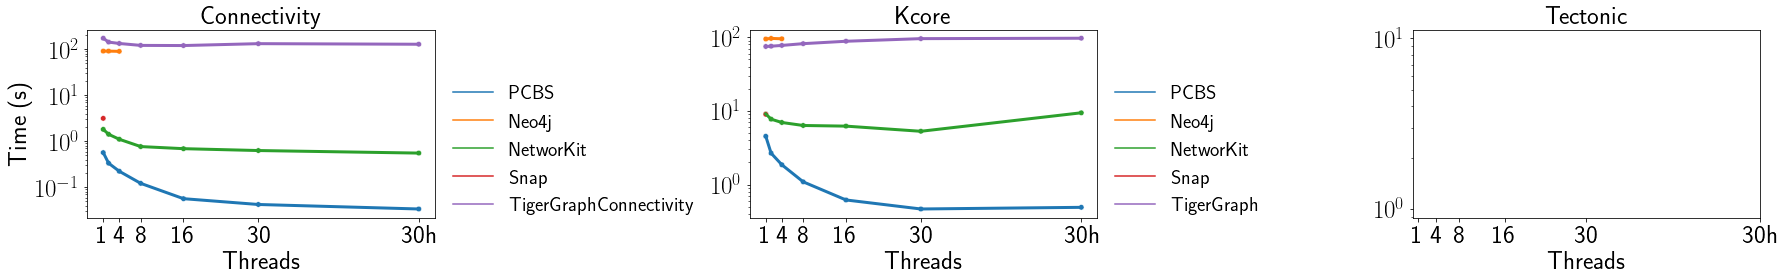

In [321]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")

df["Input Graph"] = df["Input Graph"].str.replace("amazon", "AM", regex=True)\
                                .str.replace("youtube", "YT", regex=True)\
                                .str.replace("dblp", "DB", regex=True)\
                                .str.replace("lj", "LJ", regex=True)\
                                .str.replace("orkut", "OK", regex=True)\
                                .str.replace("friendster", "FR", regex=True)

df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)

# df['Config'] = df['Config'].str.replace(",match_real_tectonic: false", "", regex=False)
# df = df[df["Config"] != "threshold: 10"]
# df = df[df['Input Graph'].isin([graph_name])]
# print(df.head())

# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()
wcc_data = df[df["Clusterer Name"].isin(["ConnectivityClusterer", "SnapConnectivity", "NetworKitConnectivity", "TigerGraphWCC", "Neo4jConnectivity"])]
kcore_data = df[df["Clusterer Name"].isin(["KCoreClusterer", "SnapKCore", "NetworKitKCore", "TigerGraphKCore", "Neo4jKCore"])]


# tectonic_data = df[df["Clusterer Name"].isin(["TectonicClusterer", "Tectonic"])]

original_tectonic = df[(df["Clusterer Name"]=="Tectonic") & (df["Input Graph"]=="youtube") & 
                       (df["Config"]=="threshold: 0.06")]
our_tectonic = df[(df["Clusterer Name"]=="TectonicClusterer") & (df["Input Graph"]=="youtube") 
                       & (df["Config"]=="threshold: 0.06,match_real_tectonic: false")]
tectonic_data = pd.concat([original_tectonic, our_tectonic])

our_name = "PCBS"

fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(25,4))#, gridspec_kw=gs_kw)
ax = axs[0]
wcc_data["Clusterer Name"] = wcc_data["Clusterer Name"].str.replace("ConnectivityClusterer", our_name)
wcc_data["Clusterer Name"] = wcc_data["Clusterer Name"].str.replace("Connectivity", "")
wcc_data["Clusterer Name"] = wcc_data["Clusterer Name"].str.replace("WCC", "Connectivity")
plot_data(wcc_data, ax)
common_ax_style(ax)
ax.set_title("Connectivity", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
kcore_data["Clusterer Name"] = kcore_data["Clusterer Name"].str.replace("KCoreClusterer", our_name)
kcore_data["Clusterer Name"] = kcore_data["Clusterer Name"].str.replace("KCore", "")
plot_data(kcore_data, ax)
common_ax_style(ax)
ax.set_title("Kcore", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
color_dict = {
    "Tectonic-orig": default_orange,
    our_name:default_blue
}
tectonic_data["Clusterer Name"] = tectonic_data["Clusterer Name"].str.replace("TectonicClusterer", our_name)
tectonic_data["Clusterer Name"] = tectonic_data["Clusterer Name"].str.replace("Tectonic", "Tectonic-orig")
plot_data(tectonic_data, ax, color_dict)
common_ax_style(ax)
ax.set_title("Tectonic", fontsize=fontsize)
ax.set_ylabel("")

plt.tight_layout()
plt.savefig("../results/runtime.pdf")

In [202]:
## compute tectonic speedup
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")

tectonic_1 = df[(df["Clusterer Name"]=="Tectonic") & (df["Input Graph"]=="youtube") 
   & (df["Threads"]==1) & (df["Config"]=="threshold: 0.06")]["Cluster Time"].mean()
tectonic_us_1 = df[(df["Clusterer Name"]=="TectonicClusterer") & (df["Input Graph"]=="youtube") 
   & (df["Threads"]==1) & (df["Config"]=="threshold: 0.06,match_real_tectonic: false")]["Cluster Time"].mean()
tectonic_us_60 = df[(df["Clusterer Name"]=="TectonicClusterer") & (df["Input Graph"]=="youtube") 
   & (df["Threads"]==60) & (df["Config"]=="threshold: 0.06,match_real_tectonic: false")]["Cluster Time"].mean()
print(tectonic_1 / tectonic_us_1, tectonic_1 / tectonic_us_60)

36.95495088789119 387.2457590766749


In [76]:
df_slpa["Clusterer Name"].unique()

array(['Neo4jSLPA', 'SLPAClusterer'], dtype=object)

/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_42484/1399729153.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LabelPropagationClusterer", our_name)
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_42484/1399729153.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LabelPropagation", "")
/var/folders/y9/y8cbtjy94z91vmk_p7zfqpyw0000gn/T/ipykernel_42484/13

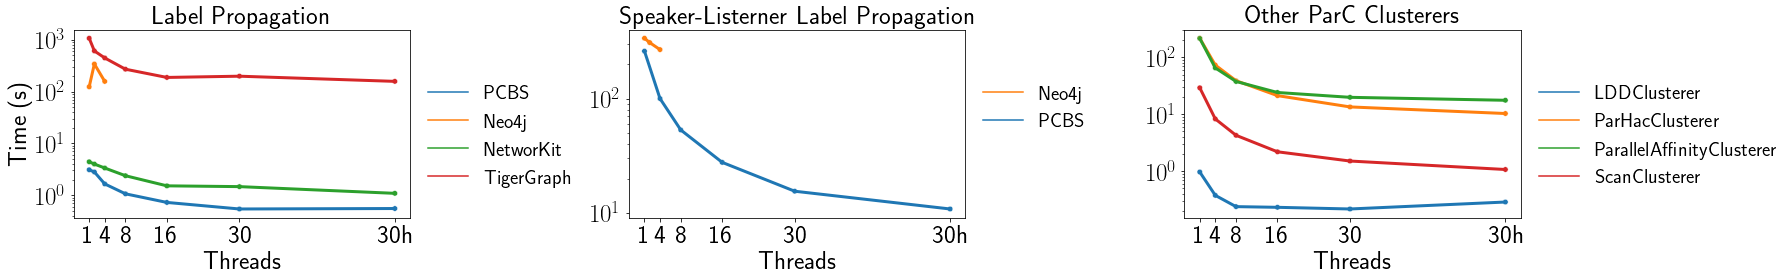

In [322]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_label.csv")
df = df[~df["Clusterer Name"].isin(["SLPAClusterer"])] # SPLAClusterer is using wrong config
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")

df_ours = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/scalability_ours.csv")
df_ours = df_ours[df_ours["Round"]!=0][['Clusterer Name', 'Input Graph', "Threads", "Cluster Time"]]
df_ours = df_ours.groupby(['Clusterer Name', 'Input Graph', "Threads"]).mean().reset_index()

df_other_ours = df_ours[~df_ours["Clusterer Name"].isin(["ParallelModularityClusterer", "ParallelCorrelationClusterer"])]


df = pd.concat([df, df2])
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)
fontsize=25
# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()

df_lp = df[df["Clusterer Name"].isin(['LabelPropagationClusterer', 'Neo4jLabelPropagation',
                               'NetworKitPLP', 'TigerGraphLabelProp'])] #'NetworKitLPDegreeOrdered', 
df_slpa =  df[df["Clusterer Name"].isin(["Neo4jSLPA", "SLPAClusterer", "TigerGraphSLLabelProp"])]


fig, axs = plt.subplots(1, 3, constrained_layout=False, figsize =(25,4))#, gridspec_kw=gs_kw)
ax = axs[0]
df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LabelPropagationClusterer", our_name)
df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LabelPropagation", "")
df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LabelProp", "")
df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("PLP", "")
df_lp["Clusterer Name"] = df_lp["Clusterer Name"].str.replace("LP", "")

plot_data(df_lp, ax)
common_ax_style(ax)
ax.set_title("Label Propagation", fontsize=fontsize)
ax.set_ylabel("Time (s)", fontsize = fontsize)

ax = axs[1]
color_dict = {
    "Neo4j": default_orange,
    our_name :default_blue
}
df_slpa["Clusterer Name"] = df_slpa["Clusterer Name"].str.replace("SLPAClusterer", our_name)
df_slpa["Clusterer Name"] = df_slpa["Clusterer Name"].str.replace("SLPA", "")
plot_data(df_slpa, ax, color_dict)
common_ax_style(ax)
ax.set_title("Speaker-Listerner Label Propagation", fontsize=fontsize)
ax.set_ylabel("")

ax = axs[2]
plot_data(df_other_ours , ax)
common_ax_style(ax)
ax.set_title("Other ParC Clusterers", fontsize=fontsize)
ax.set_ylabel("")



plt.tight_layout()
plt.savefig("../results/runtime_lp.pdf")

/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/sy/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


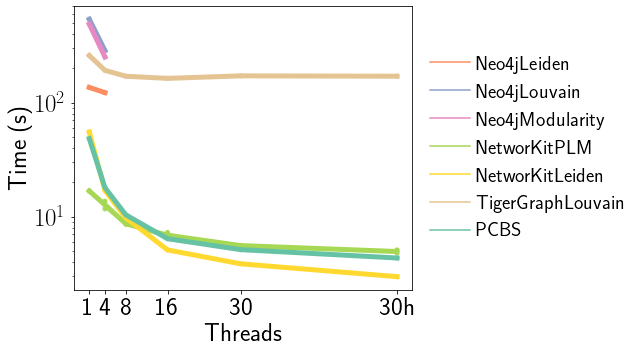

In [358]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_label.csv")
df = df[~df["Clusterer Name"].isin(["SLPAClusterer"])] # SPLAClusterer is using wrong config
df2 = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - scalability_all.csv")
df = pd.concat([df, df2])
df = df[df["Round"] != 0] # remove first round
df = df.dropna(how='all')
df['Config'].fillna('none', inplace=True)
fontsize=25
# Average over rounds
df = df.groupby(['Clusterer Name', 'Input Graph', 'Threads', 'Config'])['Cluster Time'].mean().reset_index()


df_ours = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/scalability_ours.csv")
df_ours = df_ours[df_ours["Round"]!=0][['Clusterer Name', 'Input Graph', 'Config', "Threads", "Cluster Time"]]
df_ours = df_ours.groupby(['Clusterer Name', 'Input Graph', "Threads", 'Config']).mean().reset_index()

df_other_ours = df_ours[~df_ours["Clusterer Name"].isin(["ParallelModularityClusterer", 
                                                         "ParallelCorrelationClusterer"])]


df_modularity = df[df["Clusterer Name"].isin(['Neo4jLeiden', 'Neo4jLouvain', 'Neo4jModularityOptimization', 
                                              'NetworKitPLM', 'NetworKitParallelLeiden', 'TigerGraphLouvain'])]


df_modularity_ours = df_ours[df_ours["Clusterer Name"].isin(["ParallelModularityClusterer", ])]
#                                                              "ParallelCorrelationClusterer"])]
df = pd.concat([df_modularity, df_modularity_ours])

fig, ax = plt.subplots(1, 1, constrained_layout=False, figsize =(9,5))#, gridspec_kw=gs_kw)

colors = sns.color_palette("Set2")
algorithm_names = [
    our_name,
#     'Neo4jLD',
#     'Neo4jLV',
#     'Neo4jMO',
#     'NetworKitLV',
#     'NetworKitLD',
#     'TigerGraphLV',
    'Neo4jLeiden',
    'Neo4jLouvain',
    'Neo4jModularity',
    'NetworKitPLM',
    'NetworKitLeiden',
    'TigerGraphLouvain',
    'ParCorr',
    
]

# Initialize an empty color dictionary
color_dict = {}

# Iterate over algorithm names and assign colors from the "Set2" palette
for i, name in enumerate(algorithm_names):
    color_dict[name] = colors[i]

df["Clusterer Name"] = df["Clusterer Name"].str.replace("ParallelModularityClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ParallelCorrelationClusterer", "ParCorr")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ModularityOptimization", "Modularity")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Parallel", "")
# df["Clusterer Name"] = df["Clusterer Name"].str.replace("PLM", "Louvain")
# df["Clusterer Name"] = df["Clusterer Name"].str.replace("Louvain", "LV")
# df["Clusterer Name"] = df["Clusterer Name"].str.replace("Leiden", "LD")

# plot_data(df, ax, color_dict)
sns.lineplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", linewidth=5, palette=color_dict, ax=ax)
sns.scatterplot(data=df, x="Threads", y="Cluster Time", hue="Clusterer Name", s=30, palette=color_dict, ax=ax, legend=False)
common_ax_style(ax)
# ax.set_title("Other", fontsize=fontsize)
ax.set_ylabel("Time (s)",  fontsize=fontsize)
plt.legend(#loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.5), 
            loc='center left', ncol=1, bbox_to_anchor=(1, 0.5),
               frameon=False, fontsize=fontsize-5,  handletextpad=0.3,
               columnspacing=0.6)
plt.tight_layout()

plt.savefig("../results/runtime_md.pdf")

In [305]:
# df

## Runtime Compare

In [121]:
fontsize=30

In [344]:
def plot_runtime_compare(df, base, filename, title, ncol=5, height=5, p = False):
    replace_graph_names(df)

    df_avg = df.groupby(['Clusterer Name', 'Input Graph'])['Cluster Time'].mean().reset_index()

    ## compute "speedup", actually the slowdown
    df_base = df_avg[df_avg["Clusterer Name"]==base]
    df_base = df_base.rename(columns={'Cluster Time': 'Base Time'})
    df_base = df_base.drop(columns=["Clusterer Name"])
    df_avg = df_avg.merge(df_base, on=['Input Graph'])
    df_avg["Speedup"] =  df_avg["Cluster Time"] / df_avg["Base Time"] 
    if p:
        print(df_avg)

    plt.figure(figsize=(12, height))
    # order the bars, so the base method is the first one 
    methods = df_avg["Clusterer Name"].unique().tolist()
    methods.remove(base)
    methods = [base] + methods
    ax = sns.barplot(data=df_avg, x='Input Graph', y='Speedup', hue='Clusterer Name', 
                     hue_order=methods, palette=sns.color_palette("Set2"),
                    order=["AM", "YT", "DB", "LJ", "OK", "FS"])
    
    hatch_patterns = ['/', 'x', 'o', '\\', '.', '+', 'O', '*']
    num_methods = len(methods)
    num_graphs = len(df_avg["Input Graph"].unique().tolist())

    for i, bar in enumerate(ax.patches):
        hatch_pattern = hatch_patterns[i // num_graphs]
        bar.set_hatch(hatch_pattern)

    plt.ylabel('Slowdown', fontsize=fontsize-5)
    plt.xlabel("")

    plt.yscale('log')
#     plt.yticks([1, 10, 100, 1e3, 1e4])
#     plt.legend(loc='upper right')
    if ncol == 5:
        y_anchor = 1.2
    elif ncol == 4:
        y_anchor = 1.5
    elif ncol == 3:
        y_anchor = 1.9
    
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, labels, loc='upper center', ncol=ncol, bbox_to_anchor=(0.5, y_anchor), 
               frameon=False, fontsize=fontsize-5,  handletextpad=0.3,
               columnspacing=0.6)
    set_ax_ticks(ax)
    plt.title(title, fontsize=fontsize-5, y=y_anchor-0.05)

    plt.tight_layout()
    plt.savefig(filename)


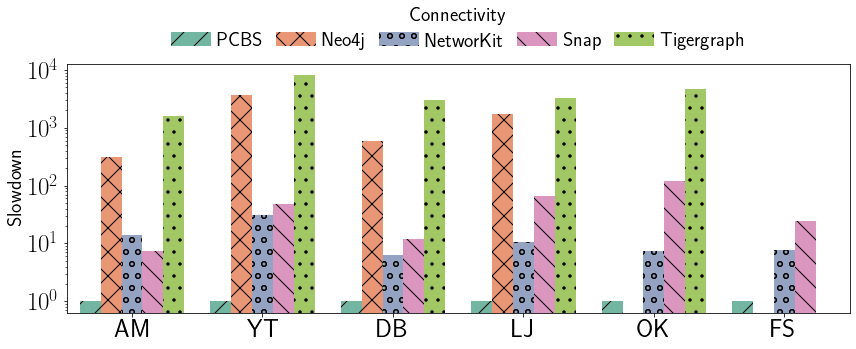

In [345]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - WCC_runtime_compare.csv")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ConnectivityClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Connectivity", "")

plot_runtime_compare(df, our_name , "../results/out_wcc_slowdown.pdf", "Connectivity", 5)

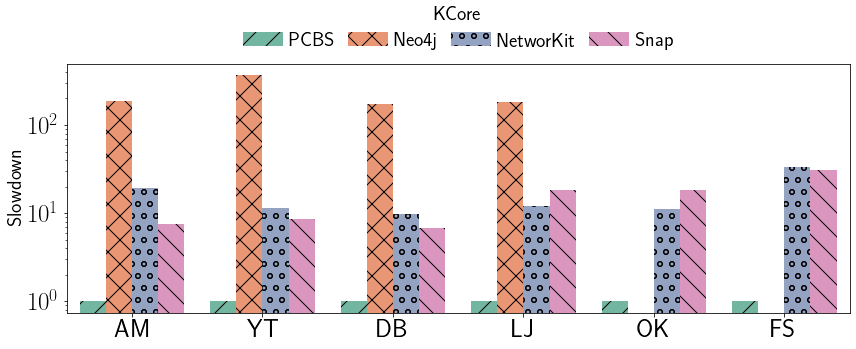

In [346]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - KCore_runtime_compare.csv")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("KCoreClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("KCore", "")
plot_runtime_compare(df, our_name ,"../results/out_kcore_slowdown.pdf", "KCore")

   Clusterer Name Input Graph  Cluster Time  Base Time      Speedup
0           Neo4j          AM     69.433672   0.055698  1246.609781
1       NetworKit          AM      0.053970   0.055698     0.968976
2            PCBS          AM      0.055698   0.055698     1.000000
3      TigerGraph          AM     19.516705   0.055698   350.402253
4           Neo4j          DB    121.644198   0.046734  2602.905755
5       NetworKit          DB      0.050250   0.046734     1.075234
6            PCBS          DB      0.046734   0.046734     1.000000
7      TigerGraph          DB     19.513715   0.046734   417.548568
8           Neo4j          LJ    151.232958   0.540434   279.836128
9       NetworKit          LJ      1.326990   0.540434     2.455415
10           PCBS          LJ      0.540434   0.540434     1.000000
11     TigerGraph          LJ    205.526987   0.540434   380.299884
12          Neo4j          YT     30.847247   0.115041   268.141336
13      NetworKit          YT      0.325790   0.

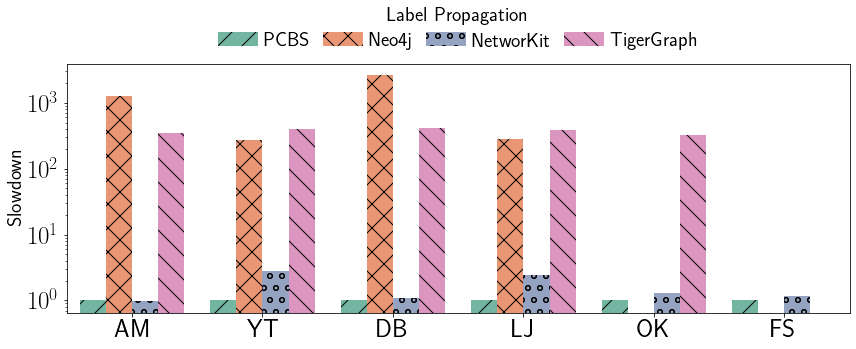

In [347]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - LP_runtime_compare.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_nk_neo4j = df[df['Config'].str.contains(r'maxIterations: 20(?:,|$)', na=False)]
df_us = df[df['Config'].str.contains(r'max_iteration: 20(?:,|$)', na=False)]
df_tg = df[df['Config'].str.contains(r'maximum_iteration: 20(?:,|$)', na=False)]
df_dlp = df[df["Clusterer Name"]=="NetworKitLPDegreeOrdered"]
df = pd.concat([df_nk_neo4j, df_us, df_tg]) #, df_dlp

df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelPropagationClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelPropagation", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("PLP", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("LabelProp", "")
# df["Clusterer Name"] = df["Clusterer Name"].str.replace("LPDegreeOrdered", "Deg")


plot_runtime_compare(df, our_name,"../results/out_lp_slowdown.pdf", "Label Propagation", p=True)

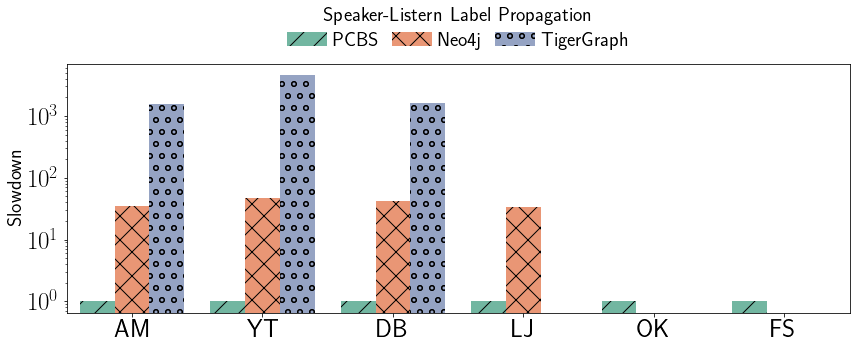

In [348]:
df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - SLPA.csv")
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df_neo4j = df[df['Config']=="maxIterations: 20,minAssociationStrength: 0.2"]
df_us = df[df['Config']=="max_iteration: 20,remove_nested: false,prune_threshold: 0.2"]
df_tg = df[df['Config']=="maximum_iteration: 20,threshold: 0.2"]
df = pd.concat([df_neo4j, df_us, df_tg])

df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLPAClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLPA", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("SLLabelProp", "")

plot_runtime_compare(df, our_name ,"../results/out_slpa_slowdown.pdf", "Speaker-Listern Label Propagation")

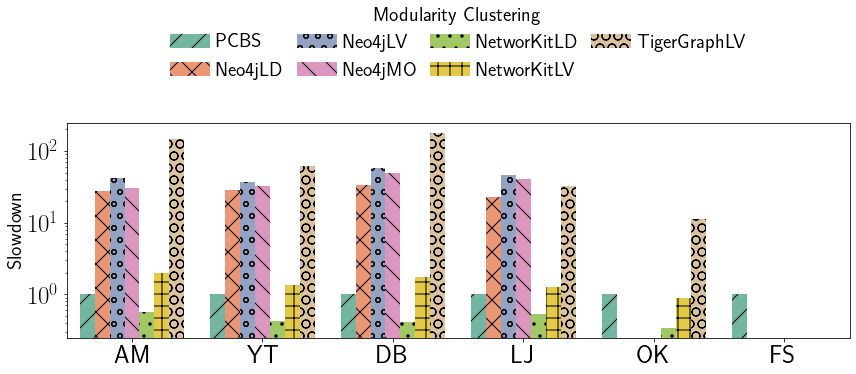

In [349]:
base_addr = "/Users/sy/Desktop/MIT/clusterer/csv/"
df_nk = pd.read_csv(base_addr + "snap_results/stats_snap_nk.csv")
df_neo4j = pd.read_csv(base_addr + "snap_results/stats_snap_neo4j.csv")
df_tg = pd.read_csv(base_addr + "snap_results/stats_snap_tg.csv")
df_google = pd.read_csv(base_addr + "snap_results/stats_snap_mod.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]


df_nk_sub = df_nk[df_nk['Config'].isin([ "use_refine: False,gamma: 1126.95,maxIter: 10,recurse: True",
                            "gamma: 1126.95,iterations: 10"])]
df_neo4j_sub = df_neo4j[df_neo4j['Config'].isin(["gamma: 1126.95,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
                              "maxIterations: 10,minCommunitySize: 2"])]
df_tg_sub = df_tg[df_tg['Config'].isin(["maxIterations: 10"])]
df_google = df_google[df_google['Config'].isin([
    "resolution: 1126.95, correlation_config: {louvain_config: {num_iterations: 10, num_inner_iterations: 10},use_refinement: false,clustering_moves_method: LOUVAIN}",
                             ])]

df = pd.concat([df_nk_sub, df_neo4j_sub, df_tg_sub, df_google])
df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ParallelModularityClusterer", our_name)
df["Clusterer Name"] = df["Clusterer Name"].str.replace("ModularityOptimization", "MO")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Parallel", "")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("PLM", "Louvain")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Louvain", "LV")
df["Clusterer Name"] = df["Clusterer Name"].str.replace("Leiden", "LD")


plot_runtime_compare(df, our_name ,"../results/out_md_slowdown.pdf", "Modularity Clustering", 4, 6)

In [350]:
df_nk = pd.read_csv(base_addr + "snap_results/stats_snap_nk.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time", "fScore_mean"]]
df_google = pd.read_csv(base_addr + "snap_results/stats_snap_mod.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time", "fScore_mean"]]
df = pd.concat([df_nk, df_google])

<Axes: xlabel='Cluster Time', ylabel='fScore_mean'>

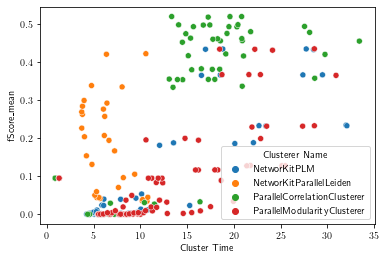

In [296]:
sns.scatterplot(data=df[df["Input Graph"]=="com-orkut.gbbs.txt"], 
                x="Cluster Time", y = "fScore_mean", hue="Clusterer Name")

In [294]:
df[df["Input Graph"]=="com-lj.gbbs.txt"].sort_values(by="fScore_mean", ascending=False)

,Input Graph,Clusterer Name,Config,Cluster Time,fScore_mean
38,com-lj.gbbs.txt,ParallelCorrelationClusterer,"resolution: 0.7,louvain_config: {num_iteration...",6.83135,0.795331
37,com-lj.gbbs.txt,ParallelCorrelationClusterer,"resolution: 0.7,louvain_config: {num_iteration...",4.84982,0.794718
39,com-lj.gbbs.txt,ParallelCorrelationClusterer,"resolution: 0.7,louvain_config: {num_iteration...",5.32499,0.794253
36,com-lj.gbbs.txt,ParallelCorrelationClusterer,"resolution: 0.7,louvain_config: {num_iteration...",6.02110,0.794017
32,com-lj.gbbs.txt,ParallelCorrelationClusterer,"resolution: 0.5,louvain_config: {num_iteration...",6.36799,0.793054
...,...,...,...,...,...
312,com-lj.gbbs.txt,ParallelModularityClusterer,"resolution: 0, correlation_config: {louvain_co...",3.49582,0.000009
313,com-lj.gbbs.txt,ParallelModularityClusterer,"resolution: 0, correlation_config: {louvain_co...",3.56746,0.000009
314,com-lj.gbbs.txt,ParallelModularityClusterer,"resolution: 0, correlation_config: {louvain_co...",4.89677,0.000009
315,com-lj.gbbs.txt,ParallelModularityClusterer,"resolution: 0, correlation_config: {louvain_co...",4.36519,0.000009


In [299]:
df_nk_sub[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]

,Input Graph,Clusterer Name,Config,Cluster Time
66,com-lj.gbbs.txt,NetworKitPLM,"use_refine: False,gamma: 43204.57,maxIter: 10,...",10.01105
134,com-amazon.gbbs.txt,NetworKitPLM,"use_refine: False,gamma: 43204.57,maxIter: 10,...",0.49485
202,com-dblp.gbbs.txt,NetworKitPLM,"use_refine: False,gamma: 43204.57,maxIter: 10,...",0.42657
270,com-youtube.gbbs.txt,NetworKitPLM,"use_refine: False,gamma: 43204.57,maxIter: 10,...",1.77834
338,com-orkut.gbbs.txt,NetworKitPLM,"use_refine: False,gamma: 43204.57,maxIter: 10,...",22.68150


In [242]:
# df = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/Graph Clustering Framework  - Modularity.csv")
# df["Input Graph"] = df["Input Graph"].str.replace("com-", "").str.replace(".gbbs.txt", "").str.replace(".ungraph.txt", "")
# df = df[df['Config'].isin(["gamma: 1,iterations: 10", "use_refine: False,gamma: 1,maxIter: 10,recurse: True",
#                              "gamma: 1,maxLevels: 10", "maxIterations: 10,maxLevels: 10", 
#                               "maxIterations: 10,minCommunitySize: 2", "maxIterations: 10"
#                              ])]
# df_google = pd.read_csv("/Users/sy/Desktop/MIT/clusterer/csv/snap_results/stats_snap_google.csv")[["Input Graph", "Clusterer Name", "Config", "Cluster Time"]]
# df_google = df_google[df_google['Config'].isin([
#     "resolution: 0.9201023981873934, correlation_config: {louvain_config: {num_iterations: 10, num_inner_iterations: 10},use_refinement: false,clustering_moves_method: LOUVAIN}",
#                              ])]

# df = pd.concat([df, df_google])
# plot_runtime_compare(df, "ParallelModularityClusterer" ,"../results/out_md_slowdown.pdf")